In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/hemanth/Downloads/Fish.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.shape

(159, 7)

In [5]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Species']= label_encoder.fit_transform(data['Species']) 
  
data['Species'].unique() 


array([0, 4, 6, 1, 2, 3, 5])

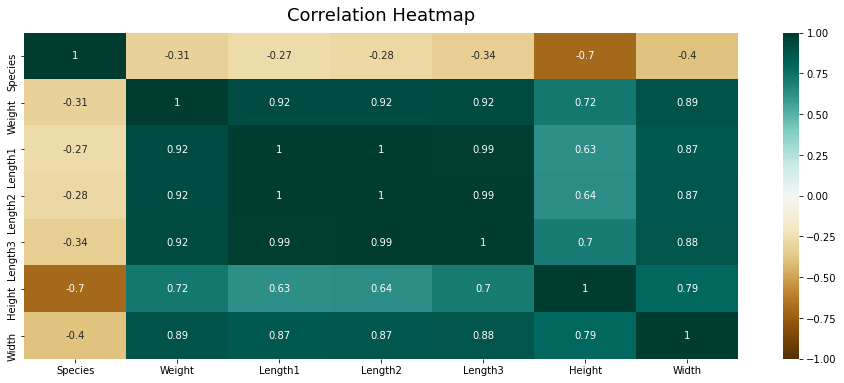

In [17]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

array([[<AxesSubplot:title={'center':'Species'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Length1'}>],
       [<AxesSubplot:title={'center':'Length2'}>,
        <AxesSubplot:title={'center':'Length3'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Width'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

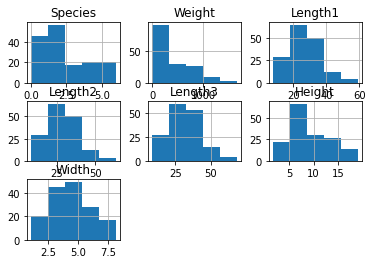

In [18]:
data.hist(bins=5)


In [19]:
feature_cols = ['Species','Length1','Length2','Length3','Height','Width']
x = data[feature_cols]
y = data.Weight

In [20]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [21]:
# fit linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Coefficients: ",regressor.intercept_, regressor.coef_)

Coefficients:  -637.4064075010148 [ 37.55666542  19.51285217  61.27829119 -56.49446698  48.09922507
   7.60615791]


In [22]:
# predict
predict_val = regressor.predict(x_test)
print(predict_val)


[ 838.94709107  158.45932136  554.20756531  169.84851525   97.54738149
  573.72248624  234.21115835  505.01358292  188.64046859  232.78586537
  157.86105271  151.34880977 -124.43820296  370.82455492  854.57005542
  144.48097008  164.39311334  550.61700487  435.88579419  287.45411428
 -122.79919209  -69.92253984  311.9104957   436.88875626  125.87014526
  836.68541373  569.20513352 -186.16340142 1137.51968954  179.42873215
  961.76425473  363.5057408   721.24965451  524.55372018  689.55470365
  420.34191035  227.67975264  291.15705597  959.35749604  450.88234598
  593.97192558  656.08522949  406.07760735 -123.50942377  499.31572027
  721.11973853   -7.6895626   717.98648094]


In [23]:
# metrics
from sklearn import metrics
import numpy as np
print(metrics.mean_absolute_error(y_test, predict_val))
print(metrics.mean_squared_error(y_test, predict_val))
print(np.sqrt(metrics.mean_squared_error(y_test,predict_val)))

print("y error (difference between observed and predicted values) = ", y_test, predict_val)

from sklearn.metrics import r2_score
print("R square ", r2_score(y_test,predict_val))

97.56153014653273
15155.167345053449
123.10632536573192
y error (difference between observed and predicted values) =  29     1000.0
42      120.0
14      600.0
91      130.0
81       85.0
19      650.0
44      145.0
11      500.0
40        0.0
97      145.0
89      135.0
94      150.0
73       32.0
105     250.0
59      800.0
90      110.0
66      140.0
54      390.0
108     320.0
100     197.0
153       9.8
35       40.0
51      180.0
5       450.0
84      125.0
31      955.0
16      700.0
145       6.7
143    1550.0
93      145.0
127    1000.0
103     260.0
111     840.0
131     300.0
58      540.0
102     300.0
47      160.0
69      200.0
33      975.0
56      270.0
132     430.0
110     556.0
106     250.0
154      12.2
12      500.0
114     700.0
75       51.5
28      850.0
Name: Weight, dtype: float64 [ 838.94709107  158.45932136  554.20756531  169.84851525   97.54738149
  573.72248624  234.21115835  505.01358292  188.64046859  232.78586537
  157.86105271  151.34880977 -124.43820

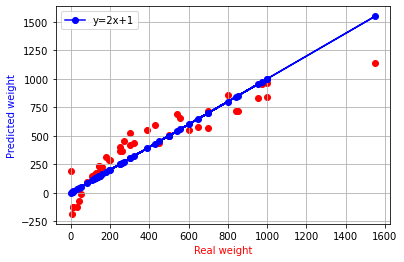

In [24]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predict_val, color='red')
plt.xlabel('Real weight', color='red')
plt.ylabel('Predicted weight', color='blue')
plt.plot(y_test, y_test + 1, '-o' , linestyle='solid',label='y=2x+1', color='blue')
plt.legend(loc='upper left')
plt.grid()
plt.show()